Adam Abate
CS 520 - Neural Networks for Machine Learning
2/25/19

In [3]:
import random

def flipCoins():
    #Each row is a coin, each column a flip
    coinFlips = []

    for coin in range(0, 1000):
        flips = []

        for flip in range(0,10):
            #Assign flip value -- 1 is heads, 0 is tails
            val = random.random()
            if (val > 0.5):
                val = 1
            if (val < 0.5):
                val = 0

            flips.append(val)

        coinFlips.append(flips)
    return coinFlips

In [4]:
#Input a vector with the flips and results of those flips for a coin
#Output the frequency of heads for that coin

coinFlips = flipCoins()

def findFreq(coinVec):
    
    headFreq = 0
    #Iterate over each flip
    for flip in range(0,len(coinVec)):
        #If the flip is a head, increment the frequency of heads
        if (coinVec[flip] == 1):
            headFreq += 1.0/len(coinVec)
    
    return headFreq

#Get the head frequencies of the requested coins
v1 = findFreq(coinFlips[0])
print(v1)

vRand = findFreq(coinFlips[random.randint(0,len(coinFlips)-1)])
print(vRand)

#For vMin, first need to figure out which coin has the minimum frequency of heads
vMin = 1.0
for coin in range(0, 1000):
    freq = findFreq(coinFlips[coin])
    if (freq < vMin):
        vMin = freq
print(vMin)

0.30000000000000004
0.6
0.1


In [5]:
#a) The probability of heads mu of the three coins selected
mu = (v1 + vRand + vMin)/3.0
mu

0.3333333333333333

In [6]:
#b) Repeat 10,000 times and get several v1, vRand, vMin
#Note: 10,000 experiments chosen due to reduced computation time as compared to 100,000 experiments
import numpy as np

experiments = []
for i in range(0,10000):
    
    coinFlips = flipCoins()
    
    v1 = findFreq(coinFlips[0])
    vRand = findFreq(coinFlips[random.randint(0,len(coinFlips)-1)])
    vMin = 1.0
    for coin in range(0, 1000):
        freq = findFreq(coinFlips[coin])
        if (freq < vMin):
            vMin = freq
    experiments.append([v1, vRand, vMin])

experiments = np.array(experiments)

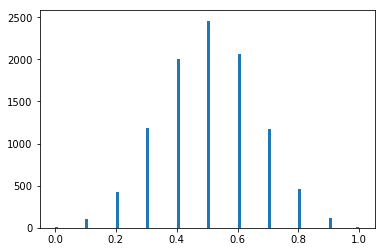

In [7]:
#b) cont.
import matplotlib.pyplot as plt

#Plot v1
numBins = 100
plt.hist(experiments[:,0], numBins)
plt.show()

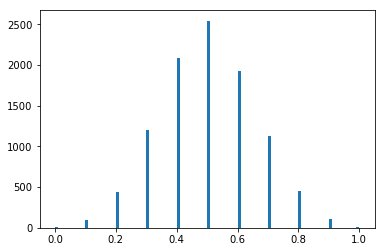

In [8]:
#b) cont.
import matplotlib.pyplot as plt

#Plot v1
numBins = 100
plt.hist(experiments[:,1], numBins)
plt.show()

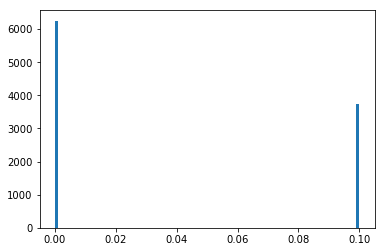

In [9]:
#b) cont.
import matplotlib.pyplot as plt

#Plot v1
numBins = 100
plt.hist(experiments[:,2], numBins)
plt.show()

In [30]:
#c) Plot estimates of P[|v-mu|>e] as a function of e with Hoeffding bound on same graph

#Specify error bound values
e = np.arange(0, 1.0, 0.05)

#Size of each sample
N=10

#Known population probability of heads
mu = 0.5

#Formula to find P[|v-mu|>e]
def hoeffdingLHS(expIndex):
    #First, get number of occurences of |v-mu|>e for given e over all 10,000 experiments
    lhs = []
    for b in range(0, len(e)):
        numTrue = 0
        for i in range(0, len(experiments[:,expIndex])):
            if (abs(experiments[i,expIndex] - mu) > e[b]):
                numTrue += 1
        #The probability of a first-coin sample having |v-mu|>e is the number of times this happens
        #in our 10,000 experiments, divided by 10,000.
        lhs.append(numTrue/float(len(experiments[:,0])))
    return lhs

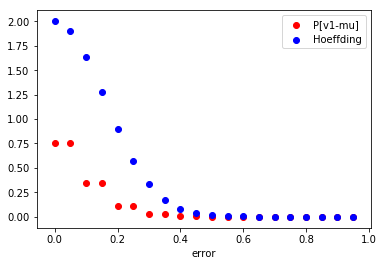

In [31]:
import math
#pV1MinusMu = []
#for b in range(0, len(e)):
#    #First, get number of occurences of |v1-mu|>e for given e over all 10,000 experiments
#    numTrue = 0
#    for i in range(0, len(experiments[:,0])):
#        if (abs(experiments[i,0] - mu)) > e[b]:
#            numTrue += 1
#    #The probability of a first-coin sample having |v1-mu|>e is the number of times this happens
#    #in our 10,000 experiments, divided by 10,000.
#    pV1MinusMu.append(numTrue/float(len(experiments[:,0])))

#Plot P[|v1-mu|>e]

#Get LHS of Hoeffding for v1
pV1MinusMu = hoeffdingLHS(0)
    
#v1MinusMu = [np.mean(experiments[:,0] - 0.5)]*len(e)
plt.scatter(e, pV1MinusMu, color="red", label="P[v1-mu]")
plt.xlabel("error")

#Plot Hoeffding RHS
hBound = []
for i in range(0, len(e)):
    exp = -2*N*math.pow(e[i],2)
    hBound.append(2*math.exp(exp))
    
plt.scatter(e, hBound, color="blue", label="Hoeffding")
plt.legend()
plt.show()

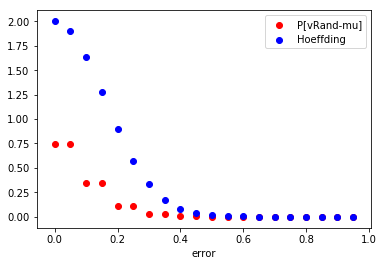

In [32]:
#c) cont.
#Plot P[|vRand-mu|>e]

#Get LHS of Hoeffding for vRand
pVRandMinusMu = hoeffdingLHS(1)

plt.scatter(e, pVRandMinusMu, color="red", label="P[vRand-mu]")
plt.xlabel("error")

#Plot Hoeffding
plt.scatter(e, hBound, color="blue", label="Hoeffding")
plt.legend()
plt.show()

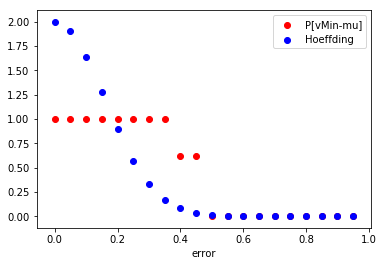

In [33]:
#c) cont.
#Plot P[|vMin-mu|>e]

#Get LHS of Hoeffding for vMin
pVMinMinusMu = hoeffdingLHS(2)

#vMinMinusMu = [np.mean(experiments[:,2] - 0.5)]*len(e)
plt.scatter(e, pVMinMinusMu, color="red", label="P[vMin-mu]")
plt.xlabel("error")

#Plot Hoeffding
plt.scatter(e, hBound, color="blue", label="Hoeffding")
plt.legend()
plt.show()